# Salary Predictions Based on Job Descriptions

## Problem Statment 

Predict the salary of an individual using data about prior individuals and their job descriptions

In [1]:
#import your libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings('ignore')

__author__ = "Vijay Raj Saravanan Radhakrishnan"
__email__ = "vijay_saravanan@outlook.com"

## Part 2 - DISCOVER

In [2]:
#load the data into a Pandas dataframe
feature_data = pd.read_csv("data/train_features.csv")
target_data = pd.read_csv("data/train_salaries.csv")
Total_data = pd.merge(feature_data, target_data, how="inner", on="jobId")
train, test = train_test_split(Total_data, test_size = 0.2)


In [3]:
train.shape

(800000, 9)

In [4]:
train.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800000 entries, 556547 to 594123
Data columns (total 9 columns):
jobId                  800000 non-null object
companyId              800000 non-null object
jobType                800000 non-null object
degree                 800000 non-null object
major                  800000 non-null object
industry               800000 non-null object
yearsExperience        800000 non-null int64
milesFromMetropolis    800000 non-null int64
salary                 800000 non-null int64
dtypes: int64(3), object(6)
memory usage: 61.0+ MB


In [5]:
train.describe()

,yearsExperience,milesFromMetropolis,salary
count,800000.000000,800000.000000,800000.000000
mean,11.991599,49.526096,116.083055
std,7.210120,28.866810,38.715074
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,89.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,74.000000,141.000000
max,24.000000,99.000000,301.000000


In [6]:
train.describe(include=["O"])

,jobId,companyId,jobType,degree,major,industry
count,800000,800000,800000,800000,800000,800000
unique,800000,63,8,5,9,7
top,JOB1362684489799,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,12987,100590,189779,425933,114682


### ---- 3 Clean the data ----

In [7]:
train.duplicated().sum()

0

In [8]:
def standard_column_names(df):
    existing_columns = list(df.columns.values)
    standardized_names = [column_name.lower() for column_name in existing_columns]
    df.columns = standardized_names

In [9]:
categ_features = ["companyid", "jobtype", "degree", "major", "industry"]
num_features = ["milesfrommetropolis", "yearsexperience"]
def convert_to_category(df):
    for cat_feature in categ_features:
        df[cat_feature] = df[cat_feature].astype("category")


In [10]:
standard_column_names(train)
standard_column_names(test)
convert_to_category(train)
convert_to_category(test)

### ---- 4 Explore the data (EDA) ----

In [11]:
def visualize_relationship(df, feature):
    if df[feature].dtype.name == "category":
        if feature == "companyId":
            pass
        elif feature == "salary":
            plt.hist(df[feature])
            plt.xlabel("Salary")
            plt.ylabel("Frequency")
        else:
            plt.figure(figsize=(16,8))
            plt.subplot(121)
            sb.countplot(data=df, x=feature)
            plt.xlabel(feature.capitalize())
            plt.ylabel("Frequency")
            plt.xticks(rotation=45)
            
            plt.subplot(122)
            sb.boxplot(df[feature], df["salary"])
            plt.xticks(rotation = 45)
            
                         
    if df[feature].dtype.name == "int64":
        plt.figure(figsize=(16, 8))
        plt.subplot(121)
        plt.hist(df[feature])
        plt.xlabel(feature.capitalize())
        plt.ylabel("Frequency")
        
        plt.subplot(122)
        plt.scatter(df[feature], df["salary"], alpha=0.2)
        plt.xlabel(feature.capitalize())
        plt.ylabel("Salary")
        plt.title("{} vs {}".format("Salary", feature.capitalize()))

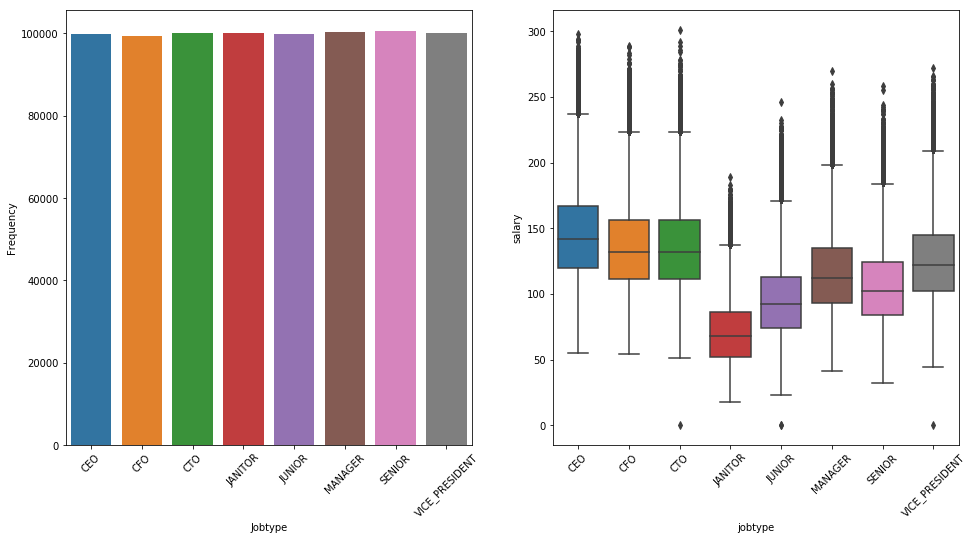

In [12]:
visualize_relationship(train, "jobtype")

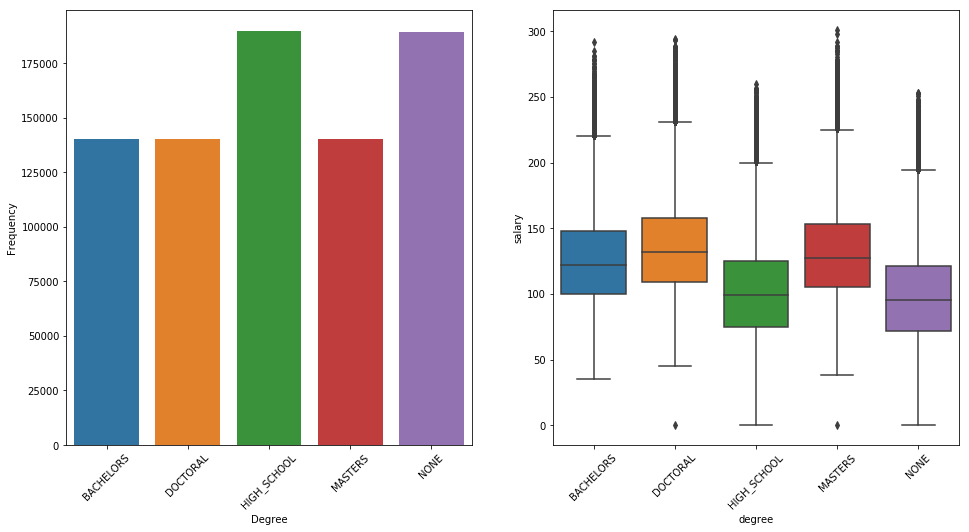

In [13]:
visualize_relationship(train, "degree")

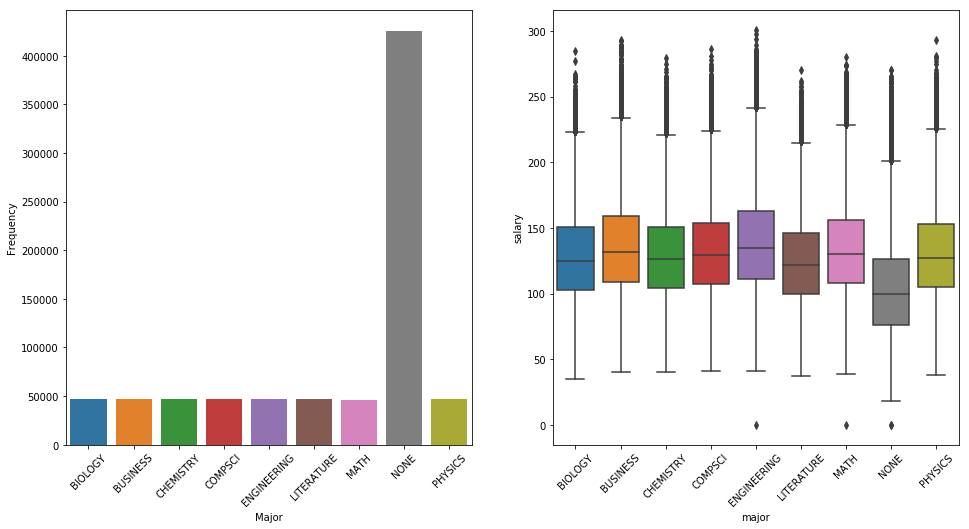

In [14]:
visualize_relationship(train, "major")

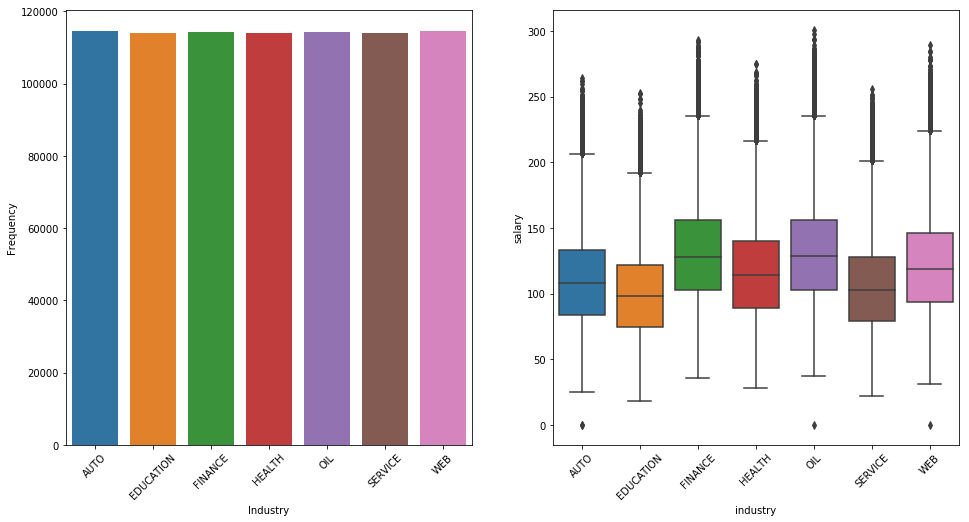

In [15]:
visualize_relationship(train, "industry")

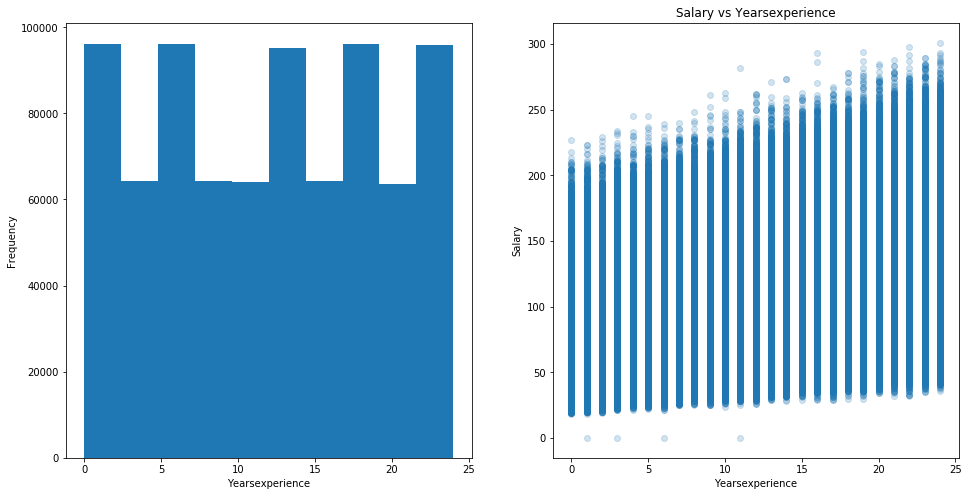

In [16]:
visualize_relationship(train, "yearsexperience")

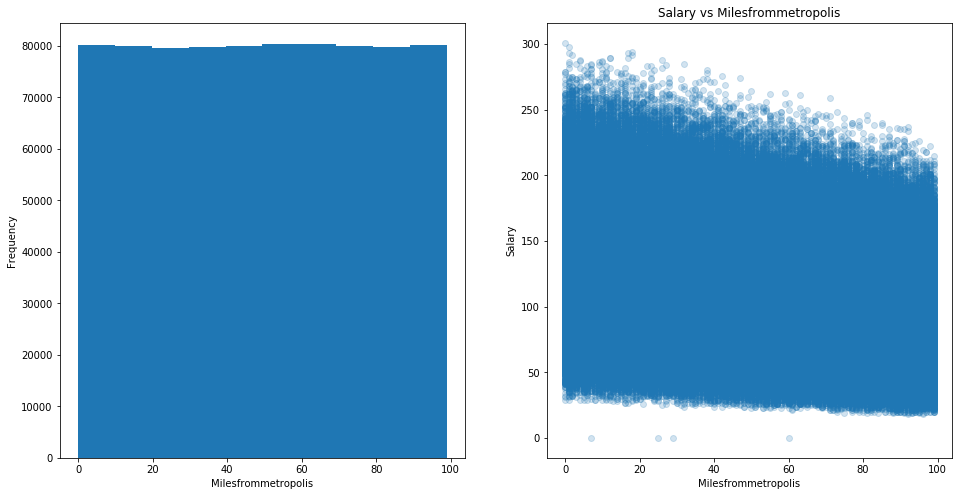

In [17]:
visualize_relationship(train, "milesfrommetropolis")

## Pipeline